$$\bigtriangledown ^2 u(x,y)=f(x,y) \text{ in } \Omega=[0,1]\times [0,1]$$
$$f(x,y)=2\pi^2 \sin (\pi x)\sin (\pi y)$$
$$u(x,y)=0 \text{ on } \partial \Omega$$
The analytic solution is $u(x,y)=2\pi^2 \sin(\pi x)\sin(\pi y)$

在 5265 次迭代后收敛


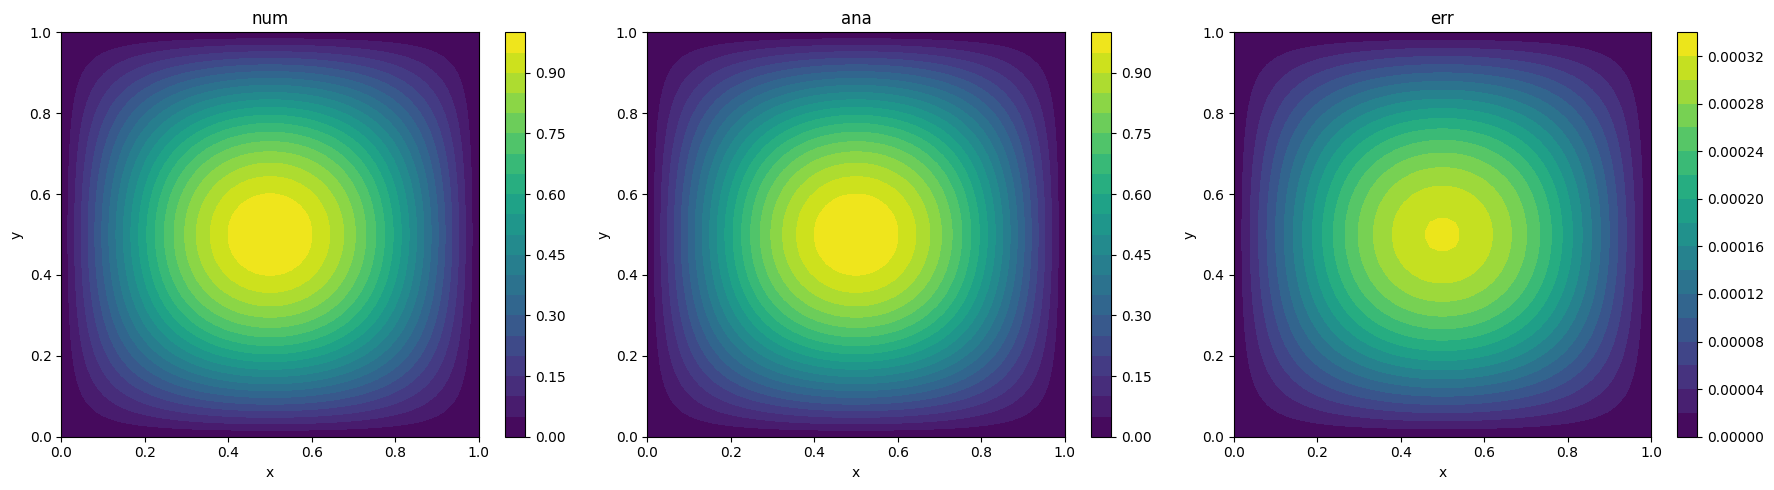

In [11]:
import numpy as np
import matplotlib.pyplot as plt

Lx = Ly = 1.0
Nx = Ny = 50
dx = Lx / (Nx - 1)
dy = Ly / (Ny - 1)

x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)

def source_term(x, y):
    return -2 * np.pi**2 * np.sin(np.pi * x) * np.sin(np.pi * y)

def analytical_solution(x, y):
    return np.sin(np.pi * x) * np.sin(np.pi * y)

u_num = np.zeros((Nx, Ny))

# 设置边界条件
u_num[0, :] = analytical_solution(x[0], y)    # 左边界
u_num[-1, :] = analytical_solution(x[-1], y)  # 右边界
u_num[:, 0] = analytical_solution(x, y[0])    # 下边界
u_num[:, -1] = analytical_solution(x, y[-1])  # 上边界

F = source_term(X, Y)

max_iter = 10000
tolerance = 1e-6

for k in range(max_iter):
    u_old = u_num.copy()
    
    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            u_num[i, j] = 0.25 * (u_old[i+1, j] + u_old[i-1, j] + 
                          u_old[i, j+1] + u_old[i, j-1] - dx*dy * F[i, j])
    
    residual = np.linalg.norm(u_num - u_old)
    if residual < tolerance:
        print(f'在 {k} 次迭代后收敛')
        break

u_ana = analytical_solution(X, Y)
error = np.abs(u_num - u_ana)

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
contour = plt.contourf(X, Y, u_num, levels=20, cmap='viridis')
plt.colorbar(contour)
plt.title('num')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 3, 2)
contour = plt.contourf(X, Y, u_ana, levels=20, cmap='viridis')
plt.colorbar(contour)
plt.title('ana')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 3, 3)
contour = plt.contourf(X, Y, error, levels=20, cmap='viridis')
plt.colorbar(contour)
plt.title('err')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()